In [1]:
#import Data_Processor as dp
import os
import time
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import matplotlib

from nltk.stem.snowball import SnowballStemmer
import nltk
import gensim
import spacy

import matplotlib.cm as cm

stemmer = SnowballStemmer("english")
nlp = spacy.load("en_core_web_sm")

In [2]:
from tool import *
# unique(x)
# find_kol(data,rank)
# unique_time(data)
# exforeign(data)
# duplicate(data)
# remove_link(data)
# remove_sign(data)
# total_clean(indata)
# toword(data,stem=False,stop=True)
# get_words(url), pos, neg, opinion
# debug2(sentence)
# month(start,end)
# search(data,keywords)
# LDA(data, topics, words,otherwords)
# NMF(data,topics,words,otherwords)
# double(data,keyword_list)
# trend(data,hint,keyword_list)
# all_trend(metadata,hint,keyword_list)
# show(entity,month,keyword) # for all_trend
# classify(monthdata)

In [3]:
def dsearch(data,have,nhave):
    result=[]
    for i in data:
        s=0
        for j in have:
            if j in i['text'].lower():
                s=1
        for j in nhave:
            if j in i['text'].lower():
                s=0
        if s:
            result.append(i)
    return result

def lsum(l):
    if type(l[0])!=list:
        return l
    result=[]
    for i in l:
        result+=i
    return result

def mean(data):
    temp1,temp2=0,0
    for i in data:
        temp1+=i['positive']
        temp2+=i['negative']
    return temp1/max(len(data),1),temp2/max(len(data),1)

from wordcloud import WordCloud, STOPWORDS
def wordcloud(data,max_words=30,otherwords={},width = 500, height = 500):
    matplotlib.rcParams['figure.dpi'] = 100
    wordcloud = WordCloud(width = width, height = height, max_words=max_words,
                background_color ='white',
                stopwords = STOPWORDS.union(otherwords)).generate(' '.join([i['text'].lower() for i in data]))
    plt.axis('off')
    plt.imshow(wordcloud)

In [4]:
msdata=[]
m=month('2017-06','2020-05')
root_path=os.getcwd()
temp=os.listdir(root_path+'\\MS_weekly')
for i in temp:
    msdata.append(total_clean(json.load(open(root_path+'\\MS_weekly\\'+i)))[:-1])
period=[]
for i in msdata:
    period+=i

In [5]:
def read_data(path):
    structure=list(os.walk(path))
    summary=[]
    for i in structure:
        if not i[1]:
            temp=[]
            for j in i[2]:
                #print(i[0]+'\\'+j)
                #temp.append([(x['text'],x['positive'],x['negative']) for x in anothertemp])
                temp.append([{'text':x['text'],'positive':x['positive'],'negative':x['negative'],
                              'likes':x['likes'],'replies':x['replies'],'screen_name':x['screen_name'],
                              'tweet_url':x['tweet_url'],} for x in remove_rubbish(json.load(open(i[0]+'\\'+j))[:-1])])
            summary.append(temp)
    #return summary
    def lsum(list_):
        result=[]
        num=len(list_[0])
        for i in range(num):
            temp=[]
            for j in list_:
                temp+=j[i]
            result.append(temp)
        return result
    return lsum(summary)
category=os.listdir(root_path+'\\SentiStrength\\final')
metadata=[]
for i in category:
    metadata.append([])
    metadata[-1]=read_data(root_path+'\\SentiStrength\\final\\'+i)

In [6]:
def andsearch(data,keywords):
    result=[]
    for i in data:
        mark=1
        for j in keywords:
            if j not in i['text'].lower():
                mark=0
        if mark:
            result.append(i)
    return result

In [7]:
'''
model = gensim.models.Word2Vec.load('D')
for item, prob in model.wv.most_similar(['advisor',], topn=30)[:10]:
    print(item, prob)
def median(num):
    x=np.median(np.abs(np.array(num)-np.median(num)))
    return [np.median(num)-2*x for i in range(36)],[np.median(num)+2*x for i in range(36)]
'''

"\nmodel = gensim.models.Word2Vec.load('D')\nfor item, prob in model.wv.most_similar(['advisor',], topn=30)[:10]:\n    print(item, prob)\ndef median(num):\n    x=np.median(np.abs(np.array(num)-np.median(num)))\n    return [np.median(num)-2*x for i in range(36)],[np.median(num)+2*x for i in range(36)]\n"

In [8]:
len(metadata)

4

In [9]:
json.load(open('jp1.json'))[0]

{'has_media': True,
 'hashtags': ['HSBC', 'JPMorgan'],
 'img_urls': ['https://pbs.twimg.com/media/EMRHKZ9U0AAwinq.jpg'],
 'is_replied': False,
 'is_reply_to': False,
 'likes': 2,
 'links': ['https://www.financialexpress.com/industry/hsbc-jpmorgan-used-bank-of-england-audio-feed-now-under-probe-says-report/1800423/'],
 'parent_tweet_id': '',
 'replies': 0,
 'reply_to_users': [],
 'retweets': 1,
 'screen_name': 'FinancialXpress',
 'text': '#HSBC, #JPMorgan used Bank of England audio-feed now under probe, says report https://www.financialexpress.com/industry/hsbc-jpmorgan-used-bank-of-england-audio-feed-now-under-probe-says-report/1800423/\xa0…pic.twitter.com/lfiaLkayuf',
 'text_html': '<p class="TweetTextSize js-tweet-text tweet-text" data-aria-label-part="0" lang="en"><a class="twitter-hashtag pretty-link js-nav" data-query-source="hashtag_click" dir="ltr" href="/hashtag/HSBC?src=hash"><s>#</s><b>HSBC</b></a>, <a class="twitter-hashtag pretty-link js-nav" data-query-source="hashtag_clic

In [10]:
def likemean(data):
    likes=0
    pos,neg=0,0
    for i in data:
        likes+=(i['likes']+1)
        pos+=(i['positive']*(i['likes']+1))
        neg+=(i['negative']*(i['likes']+1))
    return pos/max(likes,1),neg/max(likes,2)

def replymean(data):
    replies=0
    pos,neg=0,0
    for i in data:
        replies+=(i['replies']+1)
        pos+=(i['positive']*(i['replies']+1))
        neg+=(i['negative']*(i['replies']+1))
    return pos/max(replies,1),neg/max(replies,2)

def simple(data,words1,words2=None):
    if words2:
        #print('Normal:',mean(dsearch(data,words1,words2)))
        print('Like:',likemean(dsearch(data,words1,words2)))
        #print('Reply',replymean(dsearch(data,words1,words2)))
        return(text(dsearch(data,words1,words2)))
    else:
        #print('Normal:',mean(search(data,words1)))
        print('Like:',likemean(search(data,words1)))
        #print('Reply',replymean(search(data,words1)))
        return(text(search(data,words1)))

In [11]:
robo=lsum(metadata[3])
wf=search(robo,['wealthfront'])
pc=search(robo,['personal capital','personalcapital'])

In [12]:
print(likemean(dsearch(robo,[''],['wealthfront'])))
print(likemean(wf))
print(likemean(search(wf,['tool'])))

(1.6698366451697384, -1.4625413297541494)
(1.7199563851605701, -1.4256600638645862)
(1.6646464646464647, -1.2787878787878788)


integration:
<li>market scale, number of customers are increasing</li>
<li>diversity of customers' demand is increasing, security+functionality(already having or not)</li>
<li>relative advantage</li>
<li>finance stack and no complete platform $\rightarrow$ profit, customer's convenience, more data, more customers</li>
<br>other finding:
<li>gloabal service</li>
<li>official customer service account</li>

## Market scale

In [40]:
def usergrowth(data):
    result=[1]
    for i in data:
        temp=len(set())
def f(i):
    return len(set([x['screen_name'] for x in i]))

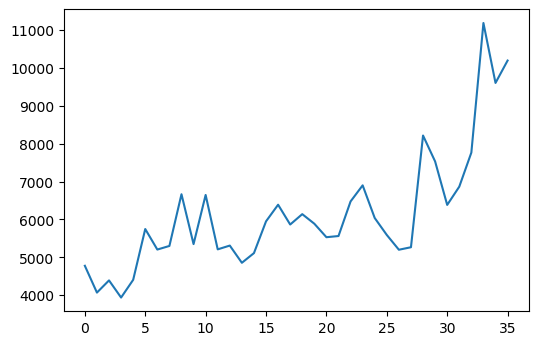

In [39]:
result=[]
for i in metadata[1]:
    result.append(f(i))
plt.plot(result)

In [16]:
\

## Integration

In [14]:
#important
text(robo)

33499


['',
 '',
 '',
 ' ',
 '  Just buy the fing latte Ellevests SallieKrawcheck has no patience for a brewing trend in personalfinance mansplaining via FastCompany ',
 '  So find support on the Quicken support phone number  Personal Capital is so cool weve put it at the top of our list of the best investment apps ',
 '  Steve Winterfeld Security Strategy at Akamai news from Hickenlooper amazon Google PersonalCapital SecureSetHQ pingidentity CoalfireSys Webroot redcanaryco and much more ',
 '  for allythey did just lower from  to  but customer service and everything has been great',
 '  good these women men rethinkimpact HeidiPatelSF SallieKrawcheck MeenaSankaran aprilkoh sm MyleaCharvat MyleneYao anniedeanzait debKilpatrick anurati aclima nextseed swarajban itschekkers classy tmwincup ellevest ',
 '  minutes until noamseg Director of User Research at Wealthfront will be on our Slack channel answering your questions Dont miss it AMA starts pm EST If you havent already signup for our Slack Th

In [15]:
text(search(robo,['askrobinhood'])) # firm integration; integration of web; integration of crypto

77


['AskRobinhood Any plans for support for PersonalCapital Pretty please ',
 'AskRobinhood Any plans in  to integrate with Mint or Personal Capital I would imagine that  of your users also track their finances with one of those two services Seems like a quick win',
 'AskRobinhood Any plans to integrate with Personal Capital in the future Happy user of both services would love to have them linked Thx',
 'AskRobinhood Any plans to integrate with a web based portfolio like Yahoo Google or Personal Capital',
 'AskRobinhood Are there plans to include syncing with PersonalCapital',
 'AskRobinhood Are you guys planning to add support for Personal Capital soon',
 'AskRobinhood Can u build an integration api Wud love my RH portfolio to be reviewed in other personal finance apps like Personal Capital',
 'AskRobinhood Can you please add support to link account to Personal Capital PersonalCapital',
 'AskRobinhood Can you please reconsider allowing PersonalCapital integration I dont understand why th

In [43]:
text(andsearch(pc,['integration'])) #coinbase integration

108


[' for Personal Capital integration This is literally the only thing stopping me from moving my stocks to RH and doing all my trading here',
 'ADP Whats the status of the broken integration to third party services like PersonalCapital and Blooom Its been broken for over  weeks now',
 'Ally Hi When might your integration with PersonalCapital start working again',
 'Ally when are you going to fix the integration issue with PersonalCapital ',
 'AllyCare did you drop integration with PersonalCapital recently',
 'Any updates on a RobinhoodApp integration mint Personal Capital Empower etc are all there already',
 'Apple provides integration of records from EHRs into Apple Health BUT Apple Card doesnt connect to tools like PersonalCapital mint So does TimCook want us to understand visualize our personal data ',
 'Apps thatll change your bum life zapier For automation and app integration notion For project managementnotetakinganything rescuetime For desktop time tracking PersonalCapital To uni

In [16]:
text(andsearch(robo,['integration'])) #coinbase integration

169


[' Wealthfront announces Coinbase account integration to track your crypto ',
 ' for Personal Capital integration This is literally the only thing stopping me from moving my stocks to RH and doing all my trading here',
 'ADP Whats the status of the broken integration to third party services like PersonalCapital and Blooom Its been broken for over  weeks now',
 'Agree on both Coinbase has public APIs so fairly trivial integration So next release ',
 'AlliantCU are there any plans to improve your integration with Wealthfront I keep getting locked out of my account and its a deal breaker',
 'Ally Hi When might your integration with PersonalCapital start working again',
 'Ally when are you going to fix the integration issue with PersonalCapital ',
 'AllyCare did you drop integration with PersonalCapital recently',
 'Any updates on a RobinhoodApp integration mint Personal Capital Empower etc are all there already',
 'Anything is possible but were not currently planning integrations with oth

In [17]:
text(andsearch(lsum(metadata[1]),['integration'])) #coinbase integration

349


[' ESPNFantasy has just been garbage with their redesign How do you redo a site and remove so many features and basically not add anything useful Good thing they spent time on the tdameritrade integration though ',
 ' Fidelity Investments through its Fidelity Digital Assets division file a license for more cryptocurrency integrationRead more ',
 ' Going to use the MorganStanley etrade announcement as an excuse to share my requested app integration RobinhoodApp venmo HOW cool would it be to Venmo BeyondMeat shares for that Saturday BBQ ',
 ' Going to use the MorganStanley etrade announcement as an excuse to share my requested app integration RobinhoodApp venmo HOW cool would it be to Venmo BeyondMeat shares for that Saturday BBQ ',
 ' Lively has removed all fees to access investment capabilities associated with our integration with TD Ameritrades Self Directed Brokerage platform You can invest in a variety of things  commissionfree ETFs  mutual funds stocks bonds etc',
 'A new Morgan St

In [18]:
text(andsearch(robo,['wealthfront','betterment'])) #coinbase integration

1297


[' And it beat the market despite taking on much less risk Wouldnt it be cool if you could use this approach at Betterment Wealthfront SigFigInsider or wherever you ',
 ' As the Dow Crashes Betterment Wealthfront Users Locked Out of Site Mobile App EXCLUSIVEUsers of roboadvisor investment service Betterment who hoped to minimize the damage of the DOWs crash points as of last countare finding them ',
 ' Betterment PersonalCapital Wealthfront Have Raised the Most Venture Capital Amongst the Online Advice Firms Better understand with ',
 ' Betterment Wealthfront PersonalCapital are the Leading Robo Advisor Firms in Terms of Assets Under Management with    Billion respectively Better understand with ',
 ' Betterment and Wealthfront are getting socially responsible sri ',
 ' Betterment or wealthfront',
 ' Betterment vs Wealthfront How  of the most popular roboadvisors stack up via BIYourMoney',
 ' Comparison Guide betterment wealthfront CharlesSchwab FutureAdvisor VanguardGroup PersonalCapi

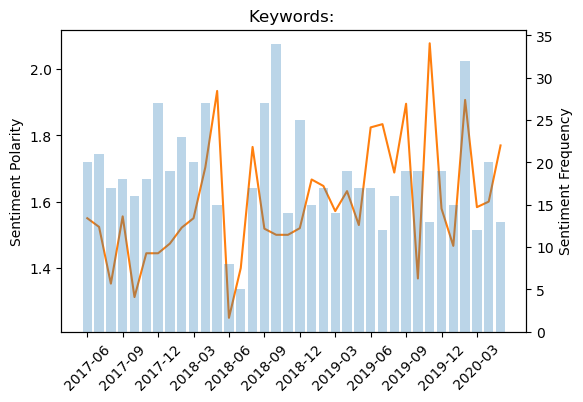

In [19]:
trend((search(i,['integration','integrate']) for i in metadata[1]),0,['']) #coinbase 

In [20]:
text([andsearch(i,['integration']) for i in metadata[1]][-2])

8


['Avid Python programmers IBKR seems to have a much seamless integration with Python than any other broker that I know of and a way simpler authentication process than with TDAmeritrade Still learning who is best ',
 'Congrats David Callahan was appointed as Senior Vice President HR Merger Integration Leader at Charles Schwab',
 'Financial tools that you should use weekly if not daily  Mint amazing integration have used for years  Robinhood Keep smallest investing account  Notes App Use this for everything from goals to do list articles you want to read What other tools do you find helpful',
 'I tried it but couldnt get used to it Im thinking about trialing dastrader and Sterling Trader I love TradingView and have thought about TradeStation integration but afraid of execution and uptime',
 'Im starting with TDAmeritrade integrations Wondering who else I should support',
 'Needed to wire money from TDBankUS and has to go sign a physical document just to move to etrade SilvergateCEO silv

In [21]:
#https://twitter.com/Pulse360/status/1176635324727885826 integration
#https://twitter.com/Pulse360/status/1176635945451323392

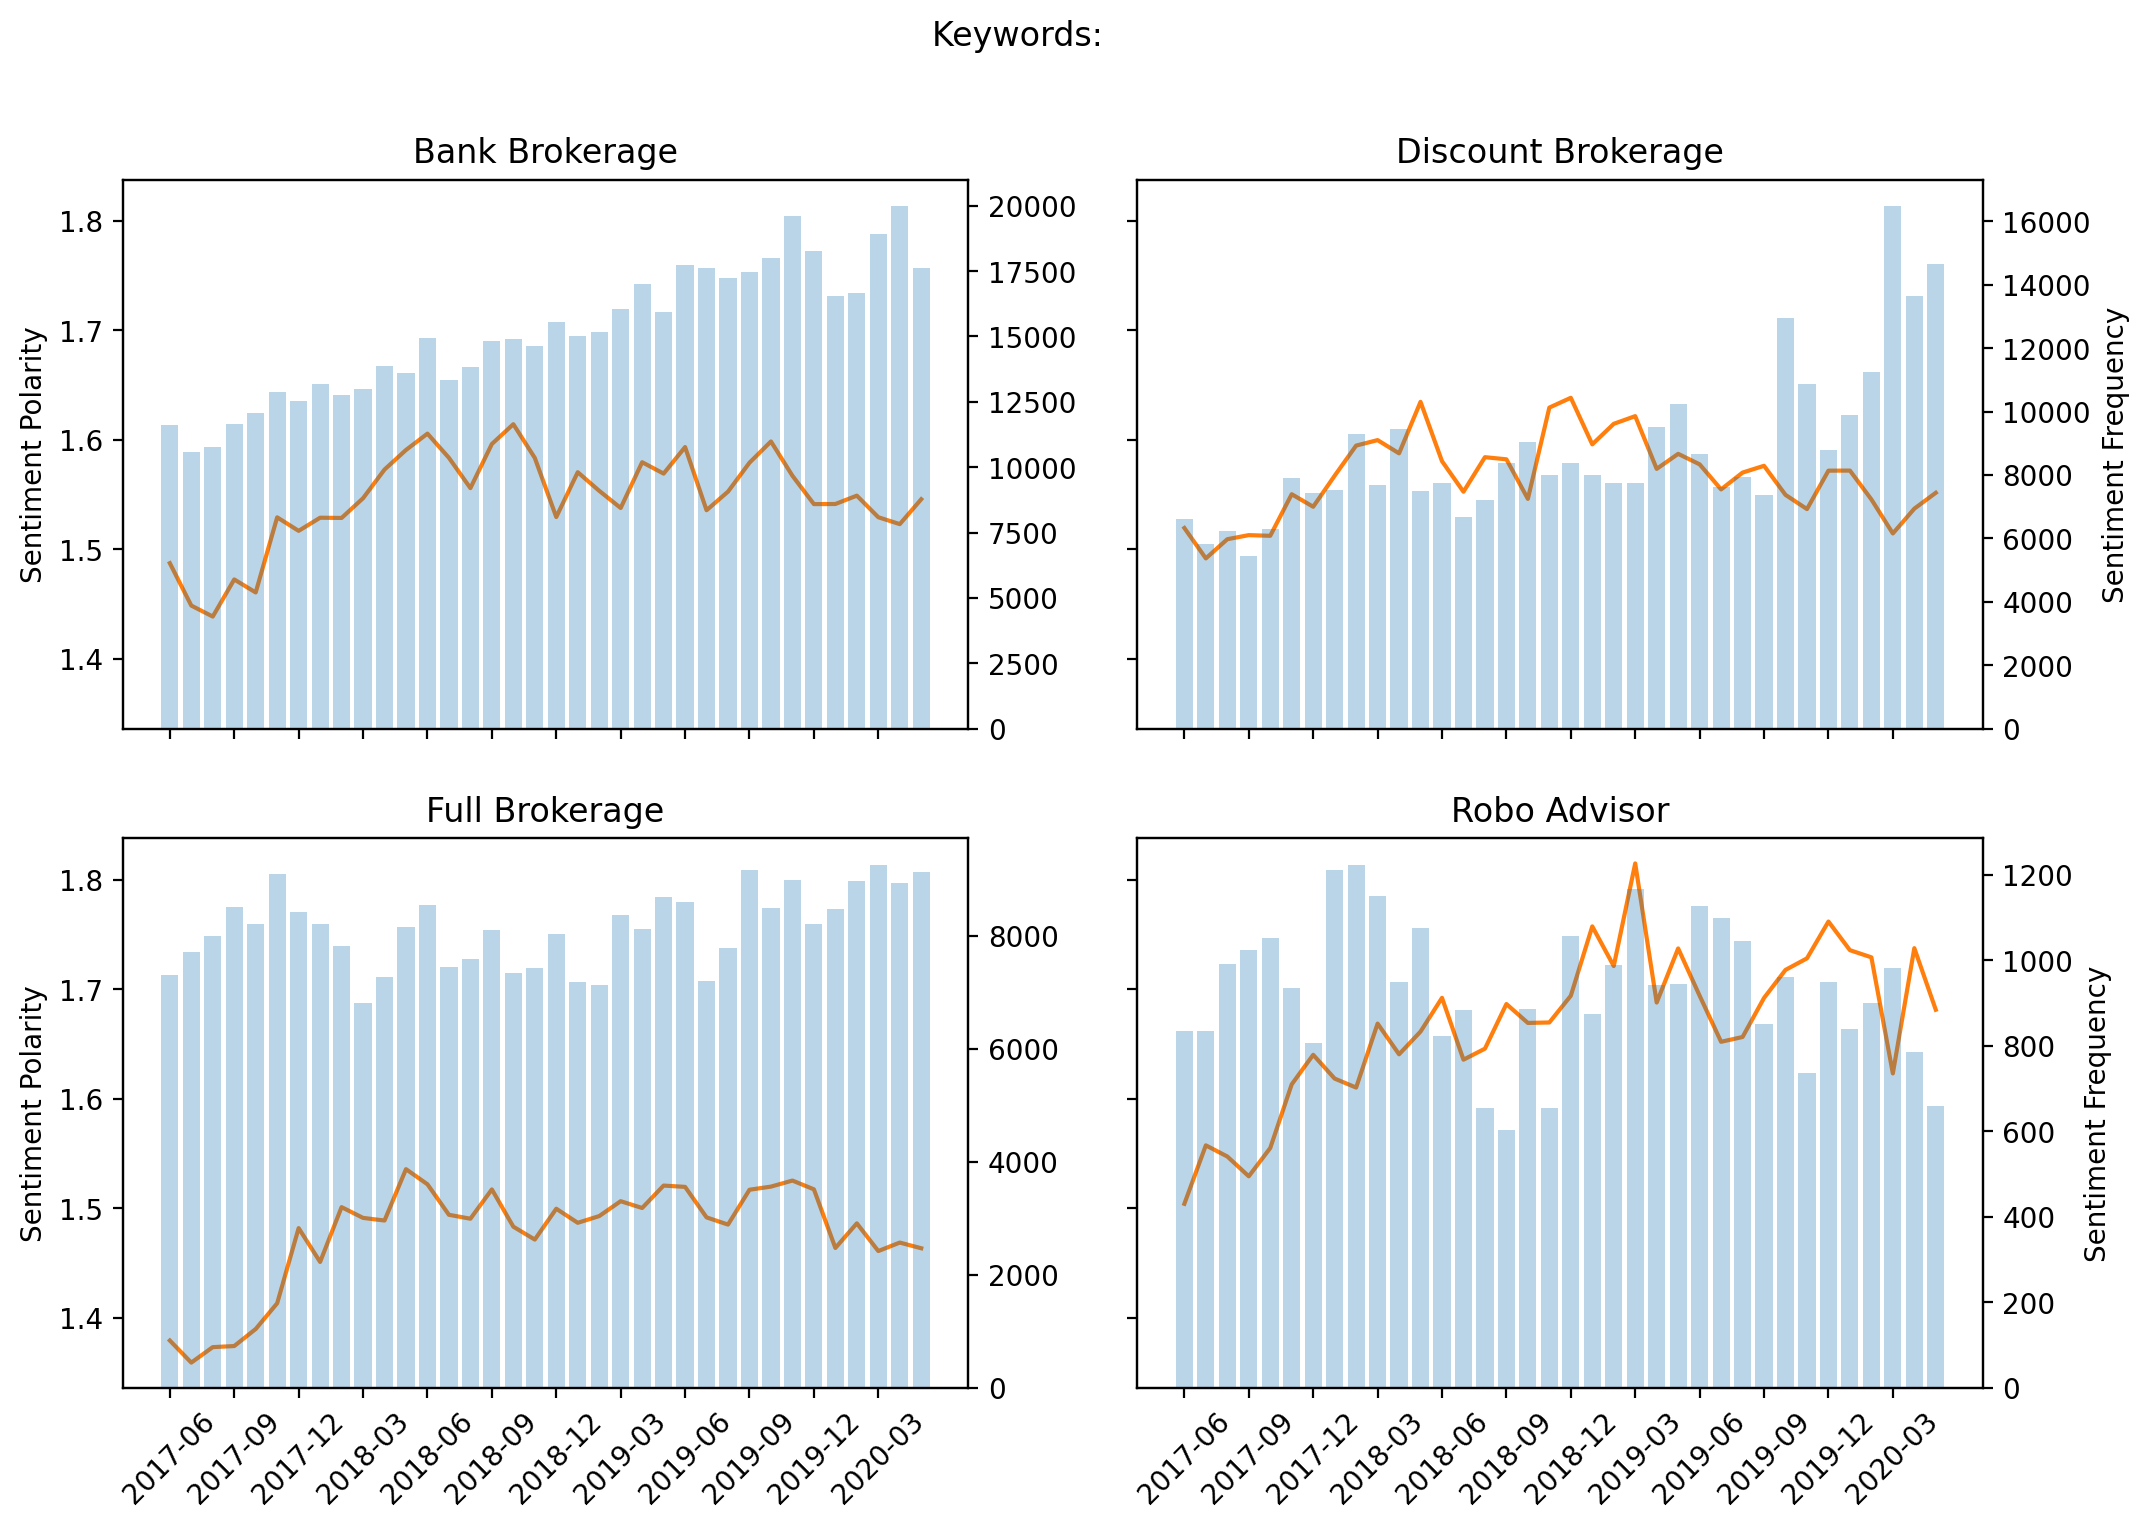

In [22]:
all_trend(metadata,0,[''])

## Data support

In [23]:
temp=list(os.walk(os.getcwd()+'\\SentiStrength\\final\\Discount Brokerage'))
discount=[]
for i in temp:
    if not i[1]:
        discount.append([])
        for j in i[2]:
            discount[-1].append(json.load(open(i[0]+'\\'+j))[:-1])
company=temp[0][1]
company

['Charles Schwab',
 'eTrade',
 'Fidelity',
 'InteractiveBrokers',
 'Robinhood',
 'TD Ameritrade',
 'Tradestation']

In [52]:
text(search(lsum(metadata[1]),['askrobinhood']))

2232


[' Again AskRobinhood RobinhoodApp data is missing not all running smooth ',
 ' AskRobinhood RobinhoodApp SOMETHING WRONG WITH APP IT BOUGHT SHARES WITH NO ORDER doesnt email NOW says I placed  day trades only ONE done SECEnforcement FINRA CyberSecOz',
 ' AskRobinhood RobinhoodApp Soooo are we good today I was able to make up some of my money YOU lost me yesterday still closing out ',
 ' AskRobinhood so when will the NDRM settlement funds hit our account RobinhoodApp TaylorVowles',
 ' DISABLE CLOSE Why do robinhoodapp refused to let me pass the warning screen and OUT positions So they can keep people keep trading with them even though the best thing for them is just take the funds and go of interest design askrobinhood',
 ' Days to release options collateral is NOT OK RobinhoodApp AskRobinhood Im leaving and moving to TDAmeritrade where I know I can get support when I need it ',
 ' I call BullShit its is not fn operational RobinhoodApp AskRobinhood ',
 ' If we get enough ppl to move I 

In [64]:
text(search(lsum(metadata[1]),['joint']))

125


[' Fidelity Investments Citadel Securities LLC and a host of other financial companies have agreed to jointly launch a new lowcost bourse that will compete with the New York Stock Exchange and Nasdaq ',
 ' fawadchaudhry Rather then New Mobile aPP for payment please work for EBusiness Application with jointly EPost MuradSaeedPTI like AlibabaEbayLazada only Certified Tax pair can be a part of etrade every country have Ebusiness App',
 ' this is too much Came through drippin in my TD Ameritrade joint Portfolio on deck',
 'A special thanks to our partner TDAmeritrade for sponsoring the Hoops For Troops event for the second year in a row over at the Naval Air Station Joint Reserve Base in Fort Worth It was really cool to see our UTAMBB and LadyMavHoops interacting with all the kids ',
 'AMs JD Ivy and Jeff Swerdlow are copresenting at the etrades  Directions Conference on May th Dont miss this joint session on the implications of the removal of the m performancebased tax deductions ',
 'Aco

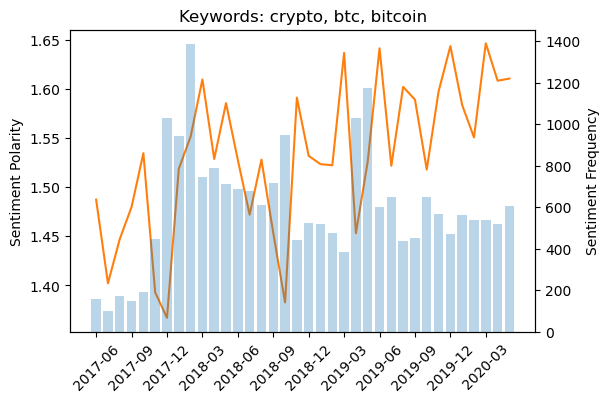

In [62]:
trend(metadata[1],0,['crypto','btc','bitcoin','coinbase','eth','blockchain'])

In [66]:
np.sum(subanalyze(metadata[1],['crypto','btc','bitcoin','coinbase','eth','blockchain'])[2])

21566

In [67]:
np.sum(subanalyze(metadata[1],[''])[2]) # 6.8

316120

In [71]:
text(andsearch(lsum(metadata[1]),['finance stack']))

13


['Glad to be part of your finance stack Cynthia Got any favourite features ',
 'Hey Charlie Were happy to be within your Finance Stack Whats the best feature that you like about Starling',
 'My Finance Stack Bank CapitalOne via an acquisition Investing etrade via an acquisition Retirement Mix of VanguardGroup Credit Cards ChaseUnited CitiAmerican DiscoverDollars Remit Xoom PayPal PP PayPal PFM Excel Lots of I just never changed accounts',
 'My Finance Stack Bank monzo StarlingBank HSBCUK Barclays firstdirect Investing thenutmegteam moneyboxteam Wealthsimple wealthifycom HLInvest moneyfarmUK Credit Cards AmexUK Crypto CryptNo PFM Lumioapp obv I have a problem ',
 'My finance stack Bank AlpineBankColo jpmorgan CharlesSchwab BankofAmerica Investing AlpineBankColo MerrillLynch GoldmanSachs and Real Estate Credit cards Amex Visa Crypto nun ya Transfers venmo Apple PFM me Please send me your recs if I should change',
 'My finance stack Bank CharlesSchwab firstrepublic Investing CharlesSchwab

In [25]:
text(search(lsum(metadata[1]),['integration','integrate']))

660


[' ESPNFantasy has just been garbage with their redesign How do you redo a site and remove so many features and basically not add anything useful Good thing they spent time on the tdameritrade integration though ',
 ' Fidelity Investments through its Fidelity Digital Assets division file a license for more cryptocurrency integrationRead more ',
 ' GOOG NFLX TSLA FB TSLA AAPL AMZN SPY OSTK tzero mediciventures bakkt RVN RIOT BTC ETC Overstocks TZero has integrated its platform with Regulated US brokers Fidelity TDAmeritrade ',
 ' Going to use the MorganStanley etrade announcement as an excuse to share my requested app integration RobinhoodApp venmo HOW cool would it be to Venmo BeyondMeat shares for that Saturday BBQ ',
 ' Going to use the MorganStanley etrade announcement as an excuse to share my requested app integration RobinhoodApp venmo HOW cool would it be to Venmo BeyondMeat shares for that Saturday BBQ ',
 ' Lively has removed all fees to access investment capabilities associate

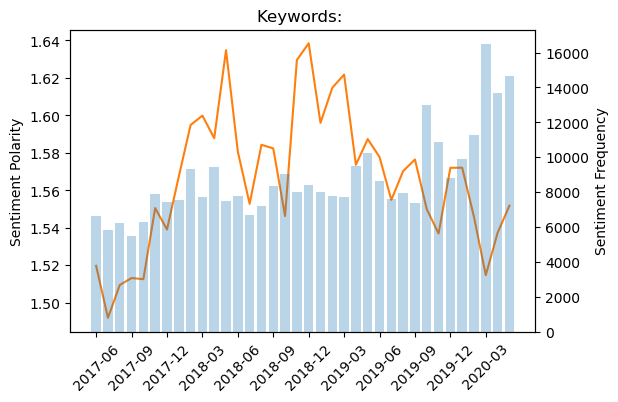

In [26]:
trend(metadata[1],0)

In [27]:
x=-4
text(search(lsum(metadata[1][x]),['integration','integrate']))

32


[' Going to use the MorganStanley etrade announcement as an excuse to share my requested app integration RobinhoodApp venmo HOW cool would it be to Venmo BeyondMeat shares for that Saturday BBQ ',
 ' Going to use the MorganStanley etrade announcement as an excuse to share my requested app integration RobinhoodApp venmo HOW cool would it be to Venmo BeyondMeat shares for that Saturday BBQ ',
 'A new Morgan Stanley digital bank in the works ETRADE also provides a full suite of digital banking services including direct integration with brokerage accounts checking and highyield savings accounts significantly accelerating Morgan Stanleys digital banking efforts',
 'AdvisorPeak Inc will be working feverishly in our integration efforts with Charles Schwab and we hope to be honored with the privilege to present at their next Integration Forum in  ',
 'As announced in VEO PreciseFP and TDAadvisors will jointly present Digitizing the Onboarding Process for TD Ameritrade Institutional Better clie

In [28]:
x=-4
text(search(lsum(metadata[1]),[' chart ', ' chart']))

3490


['  Min Chart Update Will it bounce For Details ',
 '  c TXN c Open  Close Take profit on a  Clear choice for TW Charting on though',
 '  to  UPDATE Charts below and Robinhood positions and balance at bottom of thread',
 ' Allow different sorting method allow different portfolios different watchlists  Better chart such as volume ',
 ' BTC monthly chart with SCMR candles and DJs Special Sauce added  weekly chart weeks is a long time til close but it sure looks good based on previous metrics of onchain activity and future activity like fidelity bakkt and eTrade re tweeted for ',
 ' Because Robinhood will go ahead to buy high for you As I ordered to buy while it was too high on  minutes chart then dropped  dollars that I lose too much ha I hope you will learn better to order to buy your stocks while it is nice bottom on  minutes chart',
 ' Big Stock Charts for Friday ATT Broadcom and Charles Schwab my article for investorplace T AVGO SCHW SPY QQQ DJIA DIA SLV TWTR GLD AAPL TSLA AMZN NFLX 

In [29]:
temp=[subanalyze(i) for i in discount]

In [30]:
def metasearch(metadata,keywords=['']):
    result=[]
    for i in range(len(metadata)):
        result.append([])
        for j in range(len(metadata[0])):
            result[-1].append(search(metadata[i][j],keywords))
    return result
def metarate(metadata):
    temp=[subanalyze(i)[:-1] for i in metadata]
    return np.around(np.mean(np.array(temp),axis=2),2)

In [31]:
metarate(metasearch(discount,[' chart ','chart ']))

array([[ 1.28, -1.06],
       [ 1.57, -1.64],
       [ 0.24, -0.25],
       [ 1.49, -1.9 ],
       [ 1.58, -1.51],
       [ 1.56, -1.42],
       [ 1.59, -1.32]])

In [32]:
text(lsum(metasearch(discount,[' chart ','chart '])[2]))

9


['A classic chart and it never changes Helps to put all in perspective Posted with permission from my friends at Fidelity Investments Canada ',
 'A second chart showing some of the main causes for concerns each year for the last  years Again printed with permission from my friends at Fidelity Investments Canada ',
 'In a survey by Fidelity Investments  of Americans said theyre planning to make financial resolutions for  with saving more and paying down debt topping the resolution chart Here are  ways to start and end the year strong ',
 'Meet Cora Fidelity Labs the RD thinktank inside Fidelity Investments creates first hosted experience on Amazon Sumerian Coras Virtual Chart Room ',
 'NYSE ticker VPU trailing returns for various periods chart produced by Fidelity Investments',
 'The Quants at Fidelity Investments prepared a very interest chart on the Frequency Distribution of US CPI for the period  The first thing to note its that we are far from having a Normal Distribution but one de

In [33]:
metasearch(discount,[' chart ','chart '])

[[[{'has_media': False,
    'hashtags': [],
    'img_urls': [],
    'is_replied': False,
    'is_reply_to': True,
    'likes': 0,
    'links': [],
    'parent_tweet_id': '873949973578231809',
    'replies': 0,
    'reply_to_users': [{'screen_name': 'CharlesSchwab',
      'user_id': '132703700'},
     {'screen_name': 'LizAnnSonders', 'user_id': '2961589380'}],
    'retweets': 0,
    'screen_name': 'MargeDean',
    'text': 'LizAnnSonders used  produce a D color chart with sectors showing timliness and suitability That was a great product revisit maybe',
    'text_html': '<p class="TweetTextSize js-tweet-text tweet-text" data-aria-label-part="0" lang="en"><a class="twitter-atreply pretty-link js-nav" data-mentioned-user-id="2961589380" dir="ltr" href="/LizAnnSonders"><s>@</s><b>LizAnnSonders</b></a> used 2 produce a 2-D color chart with sectors, showing timliness and suitability. That was a great product ... revisit maybe?</p>',
    'timestamp': '2017-06-11T19:21:18',
    'timestamp_epoch

In [34]:
len(search(lsum(metadata[1]),['integration','integrate']))

660

In [38]:
find_kol(metadata[1][0],10)

['dasecretamen',
 'TradeStation',
 '_xXCISXx_',
 'Tradewise',
 '_robanderson',
 'EllieMellie1',
 'NurseRabbi',
 'JayBirdOne',
 'iDStella',
 'SalethiaKenned1']